# UTS pendat

# Understanding Data

In [43]:
!pip install ucimlrepo
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [12]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# data (as pandas dataframes)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# metadata
print(cirrhosis_patient_survival_prediction.metadata)

# variable information
print(cirrhosis_patient_survival_prediction.variables)


{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

In [13]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# Ambil fitur dan target
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# Gabungkan semua ke dalam satu DataFrame
df = pd.concat([X, y], axis=1)

# Tampilkan semua data
print(df.to_string())


                Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin Cholesterol  Albumin Copper  Alk_Phos    SGOT Tryglicerides Platelets  Prothrombin  Stage Status
0    D-penicillamine  21464   F       Y            Y       Y     Y       14.5         261     2.60    156    1718.0  137.95           172       190         12.2    4.0      D
1    D-penicillamine  20617   F       N            Y       Y     N        1.1         302     4.14     54    7394.8  113.52            88       221         10.6    3.0      C
2    D-penicillamine  25594   M       N            N       N     S        1.4         176     3.48    210     516.0   96.10            55       151         12.0    4.0      D
3    D-penicillamine  19994   F       N            Y       Y     S        1.8         244     2.54     64    6121.8   60.63            92       183         10.3    4.0      D
4            Placebo  13918   F       N            Y       Y     N        3.4         279     3.53    143     671.0  113.15  

## menghapus data yang mengandung mising value

In [37]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset
data = fetch_ucirepo(id=878)

# Gabungkan fitur dan target jadi satu DataFrame
df = pd.concat([data.data.features, data.data.targets], axis=1)

# Hapus kolom yang mengandung missing value
df_cleaned = df.dropna(axis=1)

# Tampilkan kolom yang tersisa
print("Kolom yang tersisa setelah menghapus missing value:")
print(df_cleaned.columns)

# Tampilkan 5 baris pertama
print("\nData:")
print(df_cleaned.to_string())


Kolom yang tersisa setelah menghapus missing value:
Index(['Age', 'Sex', 'Edema', 'Bilirubin', 'Albumin', 'Status'], dtype='object')

Data:
       Age Sex Edema  Bilirubin  Albumin Status
0    21464   F     Y       14.5     2.60      D
1    20617   F     N        1.1     4.14      C
2    25594   M     S        1.4     3.48      D
3    19994   F     S        1.8     2.54      D
4    13918   F     N        3.4     3.53     CL
5    24201   F     N        0.8     3.98      D
6    20284   F     N        1.0     4.09      C
7    19379   F     N        0.3     4.00      D
8    15526   F     N        3.2     3.08      D
9    25772   F     Y       12.6     2.74      D
10   19619   F     N        1.4     4.16      D
11   21600   F     N        3.6     3.52      D
12   16688   F     N        0.7     3.85      C
13   20535   M     Y        0.8     2.27      D
14   23612   F     N        0.8     3.87      D
15   14772   F     N        0.7     3.66      C
16   19060   F     N        2.7     3.15    

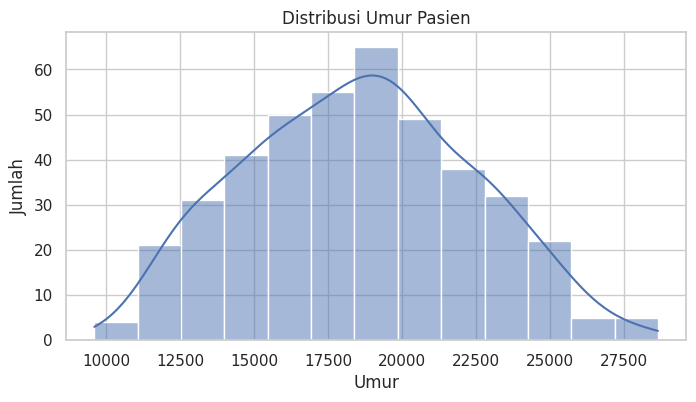

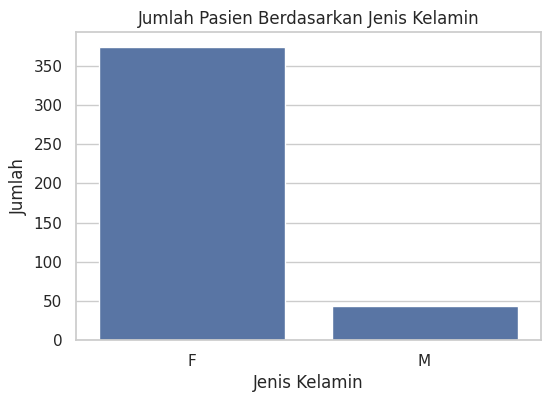

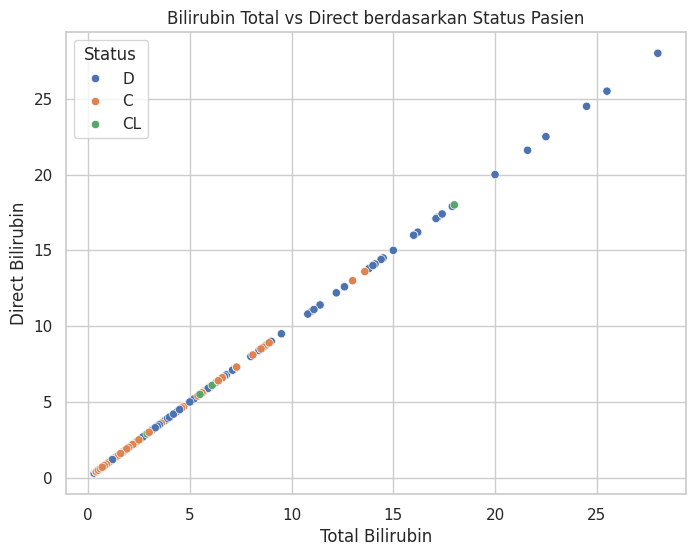

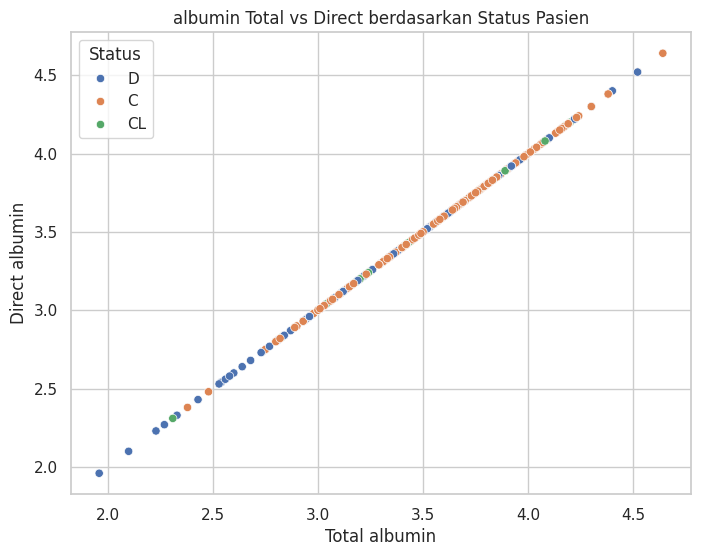

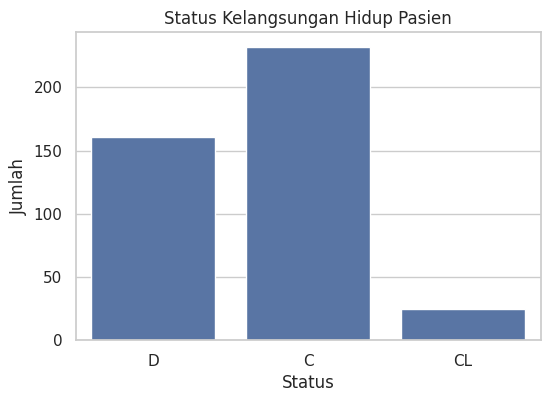

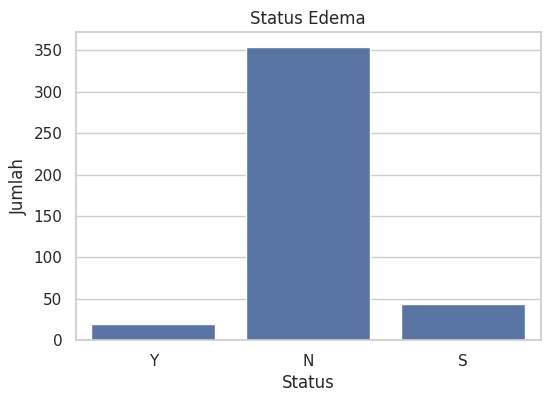

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset
data = fetch_ucirepo(id=878)
df = pd.concat([data.data.features, data.data.targets], axis=1)

# Set style
sns.set(style="whitegrid")

# 1. Histogram umur pasien
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True)
plt.title("Distribusi Umur Pasien")
plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.show()



# 2. Bar Chart jenis kelamin
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex')
plt.title("Jumlah Pasien Berdasarkan Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.show()

# 3. Scatter Plot bilirubin vs status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Bilirubin', y='Bilirubin', hue='Status')
plt.title("Bilirubin Total vs Direct berdasarkan Status Pasien")
plt.xlabel("Total Bilirubin")
plt.ylabel("Direct Bilirubin")
plt.show()
# 3. Scatter Plot Albumin vs status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Albumin', y='Albumin', hue='Status')
plt.title("albumin Total vs Direct berdasarkan Status Pasien")
plt.xlabel("Total albumin")
plt.ylabel("Direct albumin")
plt.show()

# 4. Bar Chart status kelangsungan hidup
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Status')
plt.title("Status Kelangsungan Hidup Pasien")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Edema')
plt.title("Status Edema")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.show()




## melakukan normalisasi data

In [44]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Ambil dataset
data = fetch_ucirepo(id=878)

# Gabungkan fitur dan target jadi satu DataFrame
df = pd.concat([data.data.features, data.data.targets], axis=1)

# Hapus kolom yang mengandung missing value
df_cleaned = df.dropna(axis=1)

# Normalisasi data numerik
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns  # Semua kolom numerik
scaler = StandardScaler()
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Tampilkan data yang sudah dinormalisasi
print("\nData setelah normalisasi:")
print(df_cleaned.to_string())



Data setelah normalisasi:
          Age Sex Edema  Bilirubin   Albumin Status
0    0.768941   F     Y   2.562152 -2.114296      D
1    0.546706   F     N  -0.481759  1.513818      C
2    1.852567   M     S  -0.413611 -0.041088      D
3    0.383244   F     S  -0.322748 -2.255651      D
4   -1.210972   F     N   0.040704  0.076708     CL
5    1.487073   F     N  -0.549906  1.136871      D
6    0.459334   F     N  -0.504475  1.396022      C
7    0.221881   F     N  -0.663485  1.183990      D
8   -0.789066   F     N  -0.004728 -0.983455      D
9    1.899271   F     Y   2.130553 -1.784467      D
10   0.284852   F     N  -0.413611  1.560937      D
11   0.804625   F     N   0.086135  0.053149      D
12  -0.484182   F     N  -0.572622  0.830602      C
13   0.525191   M     Y  -0.549906 -2.891749      D
14   1.332532   F     N  -0.549906  0.877720      D
15  -0.986900   F     N  -0.572622  0.382978      C
16   0.138182   F     N  -0.118307 -0.818541      D
17   0.305579   F     Y   1.857964 -1

<ipython-input-44-6a3ddf124679>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])


## mengganti kategorikal edema dan sex menjadi numerik

In [45]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Ambil dataset
data = fetch_ucirepo(id=878)

# Gabungkan fitur dan target jadi satu DataFrame
df = pd.concat([data.data.features, data.data.targets], axis=1)

# Hapus kolom yang mengandung missing value
df_cleaned = df.dropna(axis=1)

# Normalisasi data numerik
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns  # Semua kolom numerik
scaler = StandardScaler()
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Konversi kolom kategorikal menggunakan Label Encoding
label_encoder = LabelEncoder()

# Misalkan 'Sex' adalah kolom kategorikal
if 'Sex' in df_cleaned.columns:
    df_cleaned['Sex'] = label_encoder.fit_transform(df_cleaned['Sex'])

# Jika ada kolom kategorikal lainnya (misalnya 'Edema'), kita bisa juga mengonversinya
if 'Edema' in df_cleaned.columns:
    df_cleaned['Edema'] = label_encoder.fit_transform(df_cleaned['Edema'])

# Tampilkan data setelah konversi
print("\nData setelah konversi kolom kategorikal:")
print(df_cleaned.to_string())



Data setelah konversi kolom kategorikal:
          Age  Sex  Edema  Bilirubin   Albumin Status
0    0.768941    0      2   2.562152 -2.114296      D
1    0.546706    0      0  -0.481759  1.513818      C
2    1.852567    1      1  -0.413611 -0.041088      D
3    0.383244    0      1  -0.322748 -2.255651      D
4   -1.210972    0      0   0.040704  0.076708     CL
5    1.487073    0      0  -0.549906  1.136871      D
6    0.459334    0      0  -0.504475  1.396022      C
7    0.221881    0      0  -0.663485  1.183990      D
8   -0.789066    0      0  -0.004728 -0.983455      D
9    1.899271    0      2   2.130553 -1.784467      D
10   0.284852    0      0  -0.413611  1.560937      D
11   0.804625    0      0   0.086135  0.053149      D
12  -0.484182    0      0  -0.572622  0.830602      C
13   0.525191    1      2  -0.549906 -2.891749      D
14   1.332532    0      0  -0.549906  0.877720      D
15  -0.986900    0      0  -0.572622  0.382978      C
16   0.138182    0      0  -0.118307 -0.

<ipython-input-45-48a8594c827d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])
<ipython-input-45-48a8594c827d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sex'] = label_encoder.fit_transform(df_cleaned['Sex'])
<ipython-input-45-48a8594c827d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

## deteksi outlier dan ganti

In [51]:
import numpy as np

# Hitung Z-score
z_scores = np.abs((df_cleaned[numeric_cols] - df_cleaned[numeric_cols].mean()) / df_cleaned[numeric_cols].std())

# Cek apakah ada nilai lebih dari 3 (biasanya dianggap outlier)
outliers = (z_scores > 3).sum()

print("Jumlah outlier per kolom numerik:")
print(outliers)


Jumlah outlier per kolom numerik:
Age           0
Bilirubin    13
Albumin       2
dtype: int64


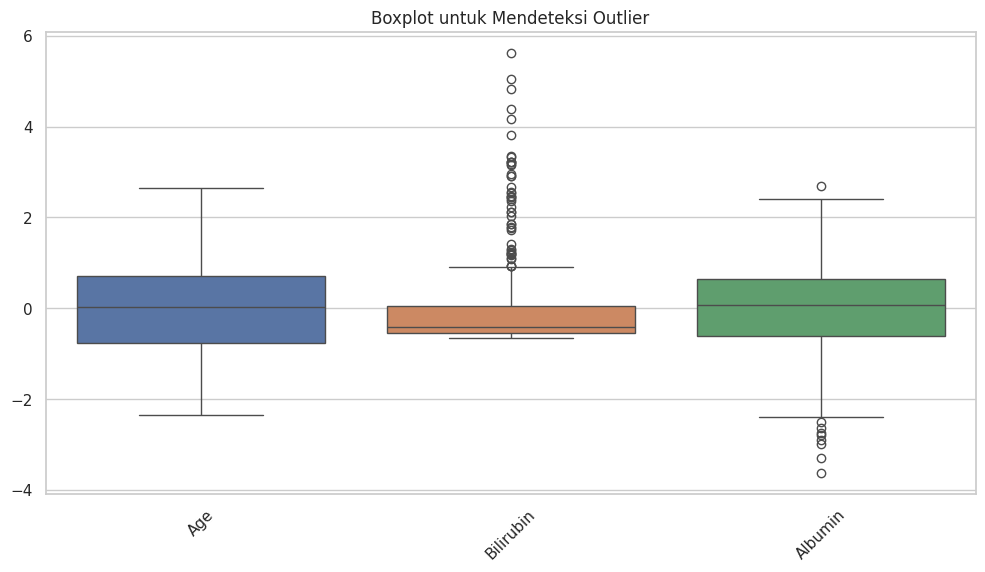

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat boxplot untuk semua kolom numerik
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.show()


In [59]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Ambil dataset
data = fetch_ucirepo(id=878)

# Gabungkan fitur dan target jadi satu DataFrame
df = pd.concat([data.data.features, data.data.targets], axis=1)

# Hapus kolom yang mengandung missing value dan buat salinan eksplisit
df_cleaned = df.dropna(axis=1).copy()

# Konversi kolom kategorikal menggunakan Label Encoding
label_encoder = LabelEncoder()
if 'Sex' in df_cleaned.columns:
    df_cleaned.loc[:, 'Sex'] = label_encoder.fit_transform(df_cleaned['Sex'])

if 'Edema' in df_cleaned.columns:
    df_cleaned.loc[:, 'Edema'] = label_encoder.fit_transform(df_cleaned['Edema'])

# Transformasi log pada kolom yang memiliki outlier
if 'Bilirubin' in df_cleaned.columns:
    df_cleaned['Bilirubin'] = np.log1p(df_cleaned['Bilirubin'])

if 'Albumin' in df_cleaned.columns:
    df_cleaned['Albumin'] = np.log1p(df_cleaned['Albumin'])

# Normalisasi kolom numerik
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_cleaned.loc[:, numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Tampilkan data hasil transformasi
print("\nData setelah transformasi log dan normalisasi:")
print(df_cleaned.head())



Data setelah transformasi log dan normalisasi:
        Age Sex Edema  Bilirubin   Albumin Status
0  0.768941   0     2   2.283439 -2.226376      D
1  0.546706   0     0  -0.542940  1.412083      C
2  1.852567   1     1  -0.354132  0.007965      D
3  0.383244   0     1  -0.136168 -2.398093      D
4 -1.210972   0     0   0.502924  0.121362     CL


<ipython-input-59-b0b56b6caebe>:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.76894112  0.54670595  1.85256717  0.38324372 -1.21097222  1.48707296
  0.45933368  0.22188052 -0.78906649  1.89927066  0.28485152  0.80462469
 -0.48418187  0.52519086  1.33253162 -0.98690039  0.13818156  0.30557948
 -0.1131777   0.88281369  1.28871429  0.53043844  0.5007896  -0.59621778
 -0.54321719  0.12296357  0.35438201 -0.55528663  1.25880307 -0.89664195
 -0.88063682  0.31187658  0.05185881  0.1263745  -0.20343614  0.54329502
  1.0528354  -1.35265698  0.44568997 -0.39025012 -1.63943743 -1.63366509
 -0.17929726 -1.26108664 -0.85754745 -0.4736867  -0.31757109 -0.15384648
  0.99773578  0.26517309  0.12899829 -0.01924595  1.59727222 -1.10628292
  1.43958233 -1.64101171  0.27120781 -0.59149496 -0.99162322  0.73220804
 -0.65577786  0.95496797 -0.39418581  1.16592083 -1.00998976 -0.41097808
  0.05238357 -1.73730487 -0.13443042  0.542

## klasifikasi knn dan naive bayes

In [57]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ambil dataset
data = fetch_ucirepo(id=878)

# Gabungkan fitur dan target jadi satu DataFrame
df = pd.concat([data.data.features, data.data.targets], axis=1)

# Hapus kolom yang mengandung missing value dan buat salinan eksplisit
df_cleaned = df.dropna(axis=1).copy()  # Membuat salinan eksplisit

# Konversi kolom kategorikal menggunakan Label Encoding (misal: 'Sex' dan 'Edema')
label_encoder = LabelEncoder()

# Gunakan .loc[] untuk memastikan modifikasi pada salinan yang benar
if 'Sex' in df_cleaned.columns:
    df_cleaned.loc[:, 'Sex'] = label_encoder.fit_transform(df_cleaned['Sex'])

if 'Edema' in df_cleaned.columns:
    df_cleaned.loc[:, 'Edema'] = label_encoder.fit_transform(df_cleaned['Edema'])

# Normalisasi data numerik
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns  # Semua kolom numerik
scaler = StandardScaler()
df_cleaned.loc[:, numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])  # Gunakan .loc[] di sini juga

# Pisahkan fitur dan target
X = df_cleaned.drop('Status', axis=1)  # Fitur (tanpa kolom 'Status')
y = df_cleaned['Status']  # Target (kolom 'Status')

# Pisahkan data menjadi data latih dan data uji (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Menentukan jumlah tetangga (k=5)
knn.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred = knn.predict(X_test)

# Evaluasi model
print("\nAkurasi Model KNN:", accuracy_score(y_test, y_pred))

# Tampilkan confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Akurasi Model KNN: 0.75

Confusion Matrix:
[[39  1  4]
 [ 3  1  0]
 [13  0 23]]

Classification Report:
              precision    recall  f1-score   support

           C       0.71      0.89      0.79        44
          CL       0.50      0.25      0.33         4
           D       0.85      0.64      0.73        36

    accuracy                           0.75        84
   macro avg       0.69      0.59      0.62        84
weighted avg       0.76      0.75      0.74        84



<ipython-input-57-1850a0ece0dc>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.76894112  0.54670595  1.85256717  0.38324372 -1.21097222  1.48707296
  0.45933368  0.22188052 -0.78906649  1.89927066  0.28485152  0.80462469
 -0.48418187  0.52519086  1.33253162 -0.98690039  0.13818156  0.30557948
 -0.1131777   0.88281369  1.28871429  0.53043844  0.5007896  -0.59621778
 -0.54321719  0.12296357  0.35438201 -0.55528663  1.25880307 -0.89664195
 -0.88063682  0.31187658  0.05185881  0.1263745  -0.20343614  0.54329502
  1.0528354  -1.35265698  0.44568997 -0.39025012 -1.63943743 -1.63366509
 -0.17929726 -1.26108664 -0.85754745 -0.4736867  -0.31757109 -0.15384648
  0.99773578  0.26517309  0.12899829 -0.01924595  1.59727222 -1.10628292
  1.43958233 -1.64101171  0.27120781 -0.59149496 -0.99162322  0.73220804
 -0.65577786  0.95496797 -0.39418581  1.16592083 -1.00998976 -0.41097808
  0.05238357 -1.73730487 -0.13443042  0.542

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pisahkan fitur dan target
X = df_cleaned.drop('Status', axis=1)  # Semua kolom kecuali target
y = df_cleaned['Status']               # Kolom target

# Bagi data menjadi training dan testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prediksi data uji
y_pred = nb.predict(X_test)

# Evaluasi model
print("Akurasi Naive Bayes:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi Naive Bayes: 0.7380952380952381

Confusion Matrix:
[[39  1  4]
 [ 4  0  0]
 [13  0 23]]

Classification Report:
              precision    recall  f1-score   support

           C       0.70      0.89      0.78        44
          CL       0.00      0.00      0.00         4
           D       0.85      0.64      0.73        36

    accuracy                           0.74        84
   macro avg       0.52      0.51      0.50        84
weighted avg       0.73      0.74      0.72        84



In [25]:
print(df.columns)


Index(['Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
       'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status'],
      dtype='object')
